# GRU
* GRU는 LSTM의 아웃풋 게이트를 두지않고 LSTM을 간단하게 변경한 구조
* 기존의 LSTM보다 약간 빨라지고, 성능은 거의 비슷하거나 약간 낮은 상태 

## 1. 데이터

In [5]:
import numpy as np

* x_train의 컬럼과 y_train의 벡터의 크기를 맞추기 위해 x_train을 reshape 한다.
* __(행, 열, 피쳐)__ == __(샘플수, 타임스탭, 피쳐)__ 같은 용어!
    * x_train : (3행, 5열, 1feature) , y_train : (3, )
    * x의 행의 수 = y의 벡터 크기 = 1
    * x_train의 행의 수 = y_train 의 벡터 크기 = 3
    * [1,2,3,4,5] -> [6] 으로 처리되는 모델 훈련 

In [6]:
x_train = np.array([[1,2,3,4,5], [2,3,4,5,6], [3,4,5,6,7]])
print("x_train.shape : ", x_train.shape) 
y_train = np.array([6,7,8])

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
print("x_train.shape : ", x_train.shape) 
print("y_train.shape : ", y_train.shape) 

x_train.shape :  (3, 5)
x_train.shape :  (3, 5, 1)
y_train.shape :  (3,)


## 2. 모델 구성

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU

* 기존의 SimpleRNN보다 4배 정도 추가 연산 수행 
* 출력 노드 수 : 처음 출력 노드 수
* __input_shape(5,1)__ : 2 차원 
    - 5 : x의 컬럼 수
    - 1 : 연산을 할 때 몇 개씩 데이터를 묶어 연산하는지(지금의 경우엔 1개씩)
* __(5,1) == (None, 5, 1)__ 같은 의미
    - None : 행
    - 5 : 열
    - 1 : 몇 개씩 잘랐는지.. 

In [8]:
model = Sequential()
model.add(GRU(7, input_shape = (5,1), activation='relu'))  # 7은 output node 수
model.add(Dense(4))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 7)                 210       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


## 3. 훈련

In [9]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(x_train, y_train, epochs=100, batch_size=1)

Train on 3 samples
Epoch 1/100
3/3 [==============================] - 1s 220ms/sample - loss: 38.7156 - mse: 38.7156
Epoch 2/100
3/3 [==============================] - 0s 4ms/sample - loss: 37.0687 - mse: 37.0687
Epoch 3/100
3/3 [==============================] - 0s 4ms/sample - loss: 35.4003 - mse: 35.4003
Epoch 4/100
3/3 [==============================] - 0s 4ms/sample - loss: 33.7629 - mse: 33.7629
Epoch 5/100
3/3 [==============================] - 0s 4ms/sample - loss: 32.1356 - mse: 32.1356
Epoch 6/100
3/3 [==============================] - 0s 4ms/sample - loss: 30.6614 - mse: 30.6614
Epoch 7/100
3/3 [==============================] - 0s 4ms/sample - loss: 28.9152 - mse: 28.9152
Epoch 8/100
3/3 [==============================] - 0s 4ms/sample - loss: 27.2965 - mse: 27.2965
Epoch 9/100
3/3 [==============================] - 0s 4ms/sample - loss: 25.8745 - mse: 25.8745
Epoch 10/100
3/3 [==============================] - 0s 3ms/sample - loss: 24.2266 - mse: 24.2266
Epoch 11/100
3/3 [

3/3 [==============================] - 0s 4ms/sample - loss: 0.0305 - mse: 0.0305  
Epoch 87/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.0303 - mse: 0.0303
Epoch 88/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.0300 - mse: 0.0300
Epoch 89/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.0296 - mse: 0.0296  
Epoch 90/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.0297 - mse: 0.0297  
Epoch 91/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.0295 - mse: 0.0295  
Epoch 92/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.0293 - mse: 0.0293
Epoch 93/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.0291 - mse: 0.0291  
Epoch 94/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.0291 - mse: 0.0291
Epoch 95/100
3/3 [==============================] - 0s 4ms/sample - loss: 0.0288 - mse: 0.0288
Epoch 96/100
3/3 [==============================] - 0

## 4. 학습과정확인

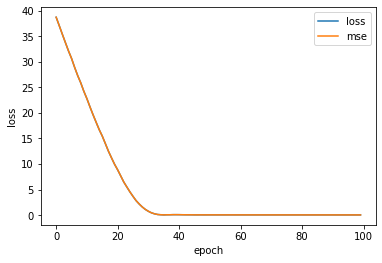

In [10]:
import matplotlib.pyplot as plt
# print(hist.history)
plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
# #plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse'], loc='upper right')
plt.show()

## 5. 평가 예측
* 예측값 데이터로 사용하기 위해 모양을 맞춰줘야 한다. 

In [11]:
x_predict = np.array([[4,5,6,7,8]])
print(x_predict.shape) #(1, 5)
x_predict = x_predict.reshape(x_predict.shape[0], x_predict.shape[1], 1)
print(x_predict.shape)

(1, 5)
(1, 5, 1)


In [12]:
y_predict = model.predict(x_predict)
print("예측값 : ", y_predict)

예측값 :  [[9.334608]]
